In [1]:
import pandas as pd
import pickle as pickle
import matplotlib.pyplot as plt

In [2]:
def load_data(dataset_dir):
    with open('/opt/ml/input/data/label_type.pkl', 'rb') as f:
        label_type = pickle.load(f)
    dataset = pd.read_csv(dataset_dir, delimiter='\t', header=None)
    dataset = preprocessing_dataset(dataset, label_type)
    return dataset

def preprocessing_dataset(dataset, label_type):
    label = []
    for i in dataset[8]:
        if i == 'blind':
            label.append(100)
        else:
            label.append(label_type[i])
    out_dataset = pd.DataFrame({'sentence':dataset[1],'entity_01':dataset[2],'entity_02':dataset[5],'label':label,})
    return out_dataset

In [3]:
dataset_path = r"/opt/ml/input/data/train/train.tsv"

dataset = load_data(dataset_path)

In [4]:
classes = dataset.groupby('label').count()['sentence'].sort_values(ascending=False)

classes

label
0     4432
10     815
4      683
2      553
15     335
6      231
7      209
5      186
17     171
8      164
20     135
9      115
24     103
1       92
21      84
23      79
33      67
11      58
22      56
25      52
14      45
12      45
3       44
27      36
35      27
32      26
16      23
38      18
34      15
31      15
30      12
13      11
36      11
39       9
28       9
26       8
18       7
29       6
41       5
19       4
37       3
40       1
Name: sentence, dtype: int64

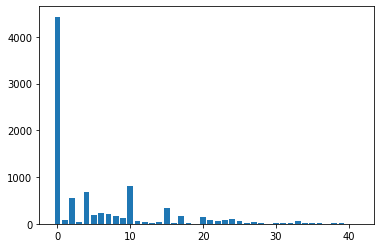

In [5]:
plt.bar(classes.index,classes)
plt.show()